In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hundred_list = [i for i in range(100)]

In [5]:
len(hundred_list)

100

In [6]:
np.std(hundred_list)

28.86607004772212

In [9]:
round(np.std(hundred_list, ddof=1), 3)

29.011

### Проект 

In [24]:
games_df = pd.read_csv('games.csv')

In [25]:
games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [34]:
games_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [33]:
games_df.dropna(inplace=True)

In [35]:
games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
games_df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [59]:
games_per_year = games_df.groupby('Year', as_index=False) \
                         .agg({'Name': 'count'}) \
                         .rename(columns={'Name' : 'quantity'})

In [60]:
games_per_year

,Year,quantity
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


<AxesSubplot:xlabel='Year', ylabel='quantity'>

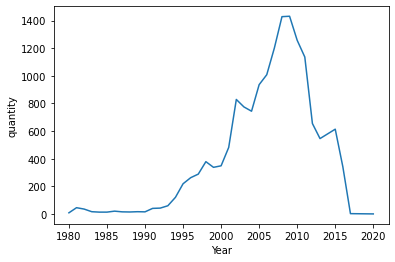

In [61]:
sns.lineplot(x=games_per_year.Year, y=games_per_year.quantity)

In [62]:
games_df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [63]:
games_df.Year.mode()

0    2009.0
dtype: float64

In [64]:
games_df.Year.median()

2007.0

In [65]:
games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [69]:
games_per_platform = games_df.groupby('Platform', as_index=False) \
                             .agg({'Name' : 'count'}) \
                             .rename(columns={'Name': 'quantity'})

In [71]:
games_per_platform['freq'] = games_per_platform.quantity/games_per_platform.quantity.sum() * 100

In [72]:
games_per_platform.head()

,Platform,quantity,freq
0,2600,116,0.712050
1,3DO,3,0.018415
2,3DS,499,3.063041
3,DC,52,0.319195
4,DS,2131,13.080842


In [77]:
games_per_platform.sort_values('freq', ascending=False) \
                  .query('freq > 7') \
                  .Platform \
                  .to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [79]:
games_per_publisher = games_df.groupby('Publisher', as_index=False) \
                              .agg({'Name': 'count'}) \
                              .rename(columns={'Name': 'quantity'})


In [80]:
games_per_publisher['freq'] = games_per_publisher.quantity/games_per_publisher.quantity.sum() * 100
games_per_publisher = games_per_publisher.sort_values('freq', ascending=False)

In [86]:
#нужно было просто найти максимальное количество выпущенных игр
#Посчитанное выше - лишнее
games_df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [88]:
games_from_Nintendo = games_df.query('Publisher == "Nintendo"')

In [90]:
print(games_from_Nintendo.NA_Sales.mean(),games_from_Nintendo.NA_Sales.median(),games_from_Nintendo.NA_Sales.std())

1.1720545977011496 0.375 2.98991281649686


In [91]:
print(games_from_Nintendo.EU_Sales.mean(),games_from_Nintendo.EU_Sales.median(),games_from_Nintendo.EU_Sales.std())

0.6010057471264371 0.12 1.7439533753820644


In [92]:
print(games_from_Nintendo.JP_Sales.mean(),games_from_Nintendo.JP_Sales.median(),games_from_Nintendo.JP_Sales.std())

0.6537212643678154 0.28 1.0631100445386494


In [93]:
print(games_from_Nintendo.Other_Sales.mean(),games_from_Nintendo.Other_Sales.median(),games_from_Nintendo.Other_Sales.std())

0.13676724137931087 0.03 0.4641703766411998


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

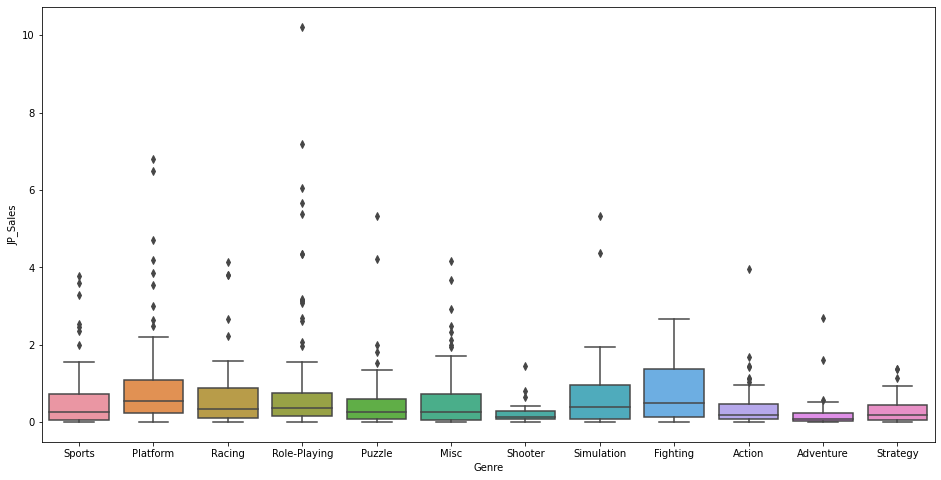

In [96]:
plt.figure(figsize=(16,8))
sns.boxplot(x=games_from_Nintendo.Genre, y=games_from_Nintendo.JP_Sales)

In [97]:
genre_list = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

In [99]:
games_from_Nintendo_five_genres = games_from_Nintendo.query('Genre in @genre_list')

In [100]:
games_from_Nintendo_five_genres.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

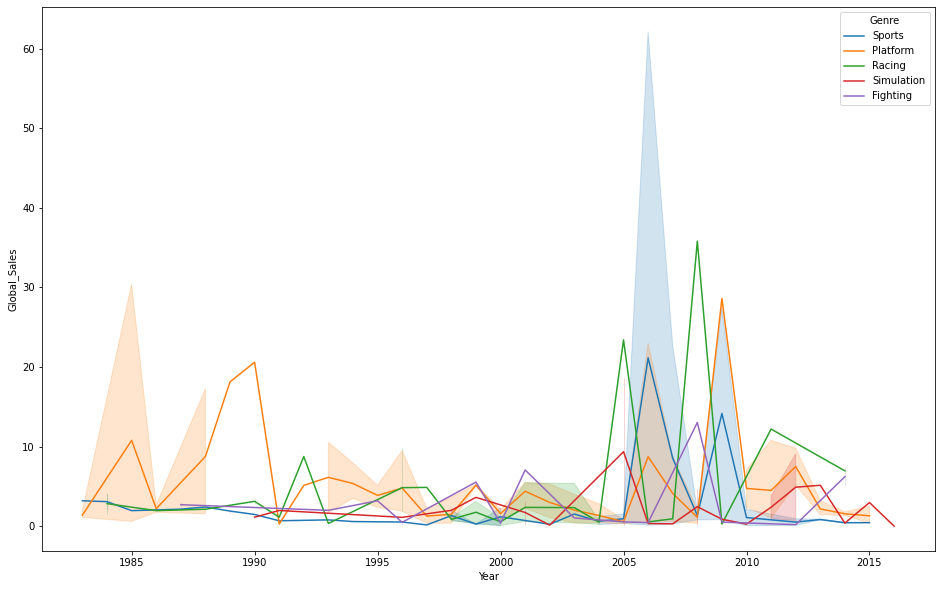

In [113]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=games_from_Nintendo_five_genres)